# Section 1 : Business Understanding

This project is about analyzing the airbnb data of 2016 in Seattle to answer the three questions below

1. Which month in Seattle had the least availability?
2. Does price have any relationship with availability?
3. What factors will affect the price?


# Section 2 : Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

calendar=pd.read_csv('calendar.csv')
listing=pd.read_csv('listings.csv')
reviews=pd.read_csv('reviews.csv')

In [2]:
calendar.info()
#Price column has some missing values, 'NaN'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [3]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


# Section 3: Data Preparation

In [4]:
#fill missing price with $0, remove ',' and '$'
calendar['price'].fillna('$0',inplace=True)
calendar['price']=calendar['price'].apply(lambda x:''.join(x.split(',')))
calendar['price']=calendar['price'].apply(lambda x:float(x.split('$')[1]))
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0


In [5]:
#availability is true or false, so convert it to 1 or 0
calendar['available']=calendar['available'].apply(lambda x:0 if x=='f' else 1)
#split year,month into a different column
calendar['year']=calendar['date'].apply(lambda x:x.split('-')[0])
calendar['month']=calendar['date'].apply(lambda x:x.split('-')[1])

In [6]:
calendar.describe()

,listing_id,available,price
count,1.393570e+06,1.393570e+06,1.393570e+06
mean,5.550111e+06,6.706100e-01,9.250720e+01
std,2.962274e+06,4.699919e-01,1.077295e+02
min,3.335000e+03,0.000000e+00,0.000000e+00
25%,3.258213e+06,0.000000e+00,0.000000e+00
50%,6.118244e+06,1.000000e+00,7.500000e+01
75%,8.035212e+06,1.000000e+00,1.300000e+02
max,1.034016e+07,1.000000e+00,1.650000e+03


In [7]:
#groupby year, only two years, not enough information
calendar_year=calendar.groupby(['year']).sum()
calendar_year.drop(['listing_id'],axis=1,inplace=True)
calendar_year.reset_index(inplace=True)
calendar_year

,year,available,price
0,2016,928844,128135307.0
1,2017,5698,779957.0


In [8]:
#groupby month
calendar_month=calendar.groupby(['month']).sum()
calendar_month.drop(['listing_id'],axis=1,inplace=True)
calendar_month.reset_index(inplace=True)
calendar_month

,month,available,price
0,01,64937,7981548.0
1,02,73321,9113355.0
2,03,83938,10798161.0
3,04,76037,10272371.0
4,05,79971,11159008.0
5,06,77244,11391415.0
6,07,74222,11288732.0
7,08,76347,11502179.0
8,09,77246,11065949.0
9,10,82438,11296639.0


In [9]:
#groupby year and month
calendar_year_month=calendar.groupby(['year','month']).sum()
calendar_year_month.drop(['listing_id'],axis=1,inplace=True)
calendar_year_month.reset_index(inplace=True)
calendar_year_month
#2017 only has one month, so we can drop it

,year,month,available,price
0,2016,01,59239,7201591.0
1,2016,02,73321,9113355.0
2,2016,03,83938,10798161.0
3,2016,04,76037,10272371.0
4,2016,05,79971,11159008.0
5,2016,06,77244,11391415.0
6,2016,07,74222,11288732.0
7,2016,08,76347,11502179.0
8,2016,09,77246,11065949.0
9,2016,10,82438,11296639.0


# Section 4: Data Analysis

<Figure size 432x288 with 0 Axes>

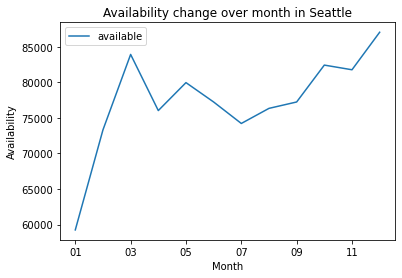

In [10]:
calendar_month=calendar_year_month[calendar_year_month['year']=='2016']
fig=plt.figure()
calendar_month.plot('month','available')
plt.xlabel('Month')
plt.ylabel('Availability')
plt.title('Availability change over month in Seattle')
plt.show()

In [11]:
#January had the lowest availability and December had the highest availability. 

In [12]:
calendar_month['average price'] = calendar_month['price']/calendar_month['available']
calendar_month

<ipython-input-12-ddada2fad7ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calendar_month['average price'] = calendar_month['price']/calendar_month['available']


,year,month,available,price,average price
0,2016,01,59239,7201591.0,121.568409
1,2016,02,73321,9113355.0,124.293927
2,2016,03,83938,10798161.0,128.644488
3,2016,04,76037,10272371.0,135.097005
4,2016,05,79971,11159008.0,139.538183
5,2016,06,77244,11391415.0,147.473137
6,2016,07,74222,11288732.0,152.094150
7,2016,08,76347,11502179.0,150.656594
8,2016,09,77246,11065949.0,143.255949
9,2016,10,82438,11296639.0,137.031939


<Figure size 432x288 with 0 Axes>

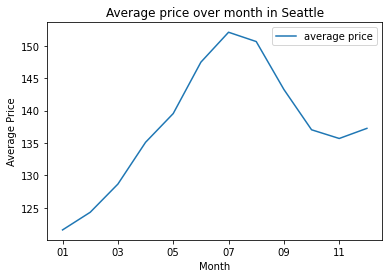

In [13]:
fig=plt.figure()
calendar_month.plot('month','average price')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average price over month in Seattle')
plt.show()

In [14]:
#groupby listing id
calendar_ls=calendar.groupby(['listing_id']).sum()
calendar_ls.reset_index(inplace=True)
calendar_ls

,listing_id,available,price
0,3335,309,37080.0
1,4291,365,29930.0
2,5682,309,16669.0
3,6606,365,33890.0
4,7369,53,4505.0
...,...,...,...
3813,10332096,365,14600.0
3814,10334184,361,43320.0
3815,10339144,0,0.0
3816,10339145,365,86835.0


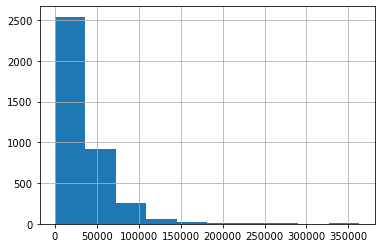

In [15]:
calendar_ls['price'].hist()

In [16]:
calendar_ls_n=calendar_ls[calendar_ls['price']<=50000]

<Figure size 432x288 with 0 Axes>

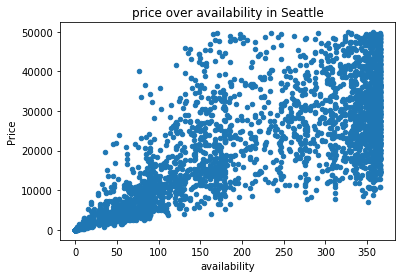

In [17]:
fig=plt.figure()
calendar_ls_n.plot('available','price',kind='scatter')
plt.xlabel('availability')
plt.ylabel('Price')
plt.title('price over availability in Seattle')
plt.show()

In [18]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [19]:
#get the percentage of missing values
listing_miss = pd.DataFrame((listing.isnull().sum())*100/len(listing), columns=['Missing Values %'])
listing_miss[listing_miss['Missing Values %']>0.2].sort_values('Missing Values %')

,Missing Values %
host_location,0.209534
bathrooms,0.419068
summary,4.635935
host_neighbourhood,7.857517
thumbnail_url,8.381351
medium_url,8.381351
xl_picture_url,8.381351
neighbourhood,10.895757
host_response_time,13.698271
host_response_rate,13.698271


In [20]:
#License and square_feet columns have almost 100% missing values, then drop them first.
#based on the knowledge, notes is not relevant to the question, drop it as well 

listing=listing.drop(['license','square_feet','notes'],axis=1)


In [21]:
listing[['security_deposit','cleaning_fee']].info()
#These two are categorical variable, we can replace missing value as 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   security_deposit  1866 non-null   object
 1   cleaning_fee      2788 non-null   object
dtypes: object(2)
memory usage: 59.8+ KB


In [22]:
#security_deposti and cleaning_fee is null so it probably means that there is no security deposit and cleaning fee needed, so I fill them with $0.
listing['security_deposit'].fillna('$0',inplace=True)
listing['cleaning_fee'].fillna('$0',inplace=True)

In [23]:
# Convert these two column to numeric, by removing , and $
listing['security_deposit'] = listing['security_deposit'].apply(lambda x: ''.join(x.split(',')))
listing['security_deposit'] = listing['security_deposit'].apply(lambda x: float(x.split('$')[1]))
listing['cleaning_fee'] = listing['cleaning_fee'].apply(lambda x: ''.join(x.split(',')))
listing['cleaning_fee'] = listing['cleaning_fee'].apply(lambda x: float(x.split('$')[1]))

In [24]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
 

In [25]:
#Check the amenities column and noted that it has multiple items, then split them in a list
listing['amenities']
listing['amenities'] = listing['amenities'].apply(lambda x: x[1:-1].split(','))

In [26]:
#sepearate the amenities apart
listing['TV'] = 0
listing['Internet'] = 0
listing['Kitchen'] = 0
listing['Free_parking'] = 0
listing['Washer_dryer'] = 0
listing['Air Conditioning'] = 0
listing['Smoke_detector'] = 0

In [27]:
def total_count(df,col1,col2,col3,col4,col5,col6,col7,look_for):
    '''
    INPUT:
    df - the pandas datafram you want to search
    col1,col2,col3,col4,col5,col6,col7 - the column you want to look through
    look_for - the column you want to count values from
    OUTPUT:
    df - a dataframe with the count of how often it show up
    '''
    for i in range(len(df)):
        if col1 in df.loc[i,look_for]:
            df.loc[i,col1] = 1 
        if col2 in df.loc[i,look_for]:
            df.loc[i,col2] = 1
        if col3 in df.loc[i,look_for]:
            df.loc[i,col3] = 1
        if col4 in df.loc[i,look_for]:
            df.loc[i,col4] = 1
        if col5 in df.loc[i,look_for]:
            df.loc[i,col5] = 1
        if col6 in df.loc[i,look_for]:
            df.loc[i,col6] = 1
        if col7 in df.loc[i,look_for]:
            df.loc[i,col7] = 1 
    return df

In [28]:
total_count(listing,'Kitchen','"Air Conditioning"','"Smoke Detector"','"Free Parking on Premises"','Washer','TV','Internet','amenities')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,Internet,Kitchen,Free_parking,Washer_dryer,Air Conditioning,Smoke_detector,"""Air Conditioning""",Washer,"""Smoke Detector""","""Free Parking on Premises"""
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,1,1,0,0,0,0,1.0,1.0,NaN,NaN
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,1,1,0,0,0,0,NaN,1.0,1.0,1.0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,1,1,0,0,0,0,1.0,1.0,1.0,1.0
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,1,1,0,0,0,0,NaN,1.0,1.0,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,1,1,0,0,0,0,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,https://www.airbnb.com/rooms/8101950,20160104002432,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,1,1,0,0,0,0,1.0,1.0,1.0,1.0
3814,8902327,https://www.airbnb.com/rooms/8902327,20160104002432,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,1,1,0,0,0,0,NaN,NaN,1.0,1.0
3815,10267360,https://www.airbnb.com/rooms/10267360,20160104002432,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,0,1,0,0,0,0,NaN,1.0,1.0,1.0
3816,9604740,https://www.airbnb.com/rooms/9604740,20160104002432,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,0,1,0,0,0,0,NaN,NaN,1.0,1.0


In [30]:
#We don't have too many rows, and for price, it makes sense to fill null with 0 to analyze
listing['monthly_price'].fillna('$0', inplace=True)
listing['weekly_price'].fillna('$0', inplace=True)
listing = listing[listing['price'].notnull()]

In [31]:
listing['price'] = listing['price'].apply(lambda x: ''.join(x.split(',')))

In [32]:
listing['price'] = listing['price'].apply(lambda x: float(x.split('$')[1]))

In [33]:
listing['monthly_price'] = listing['monthly_price'].apply(lambda x: ''.join(x.split(',')))
listing['weekly_price'] = listing['weekly_price'].apply(lambda x: ''.join(x.split(',')))

In [34]:
listing['monthly_price'] = listing['monthly_price'].apply(lambda x: float(x.split('$')[1]))
listing['weekly_price'] = listing['weekly_price'].apply(lambda x: float(x.split('$')[1]))

In [35]:
listing[['price','monthly_price','weekly_price']].sample(5)

,price,monthly_price,weekly_price
2678,190.0,0.0,0.0
833,85.0,2600.0,0.0
3420,400.0,0.0,0.0
112,200.0,0.0,0.0
1136,125.0,0.0,0.0


In [36]:
import seaborn as sns
import matplotlib.pyplot  as plt

In [37]:
#Check correlation between price and other factors
listing.corr()['price'].dropna().sort_values()

reviews_per_month                -0.218588
number_of_reviews                -0.124695
longitude                        -0.102420
availability_90                  -0.058810
calculated_host_listings_count   -0.054092
host_id                          -0.051332
availability_60                  -0.049336
id                               -0.046289
review_scores_value              -0.041776
availability_30                  -0.037653
availability_365                 -0.015550
latitude                         -0.008904
maximum_nights                   -0.003336
review_scores_checkin             0.007877
review_scores_communication       0.012990
minimum_nights                    0.017297
review_scores_accuracy            0.019026
review_scores_cleanliness         0.054357
review_scores_rating              0.055551
review_scores_location            0.075069
Internet                          0.076280
host_listings_count               0.093962
host_total_listings_count         0.093962
Kitchen    

# Section 6 : Evaluation

1. Which month in Seattle had the least availability?


<Figure size 432x288 with 0 Axes>

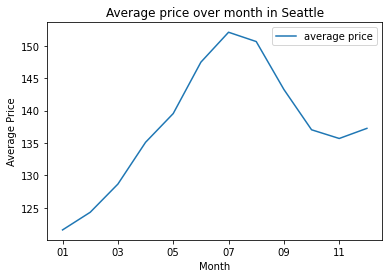

In [38]:
fig=plt.figure()
calendar_month.plot('month','average price')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average price over month in Seattle')
plt.show()

Analyzing the calendar dataset, I am able to get a plot as above. In 2016, January had the least availability across Seattle, and December had the most availability.



2. Does price have any relationship with availability?



<Figure size 432x288 with 0 Axes>

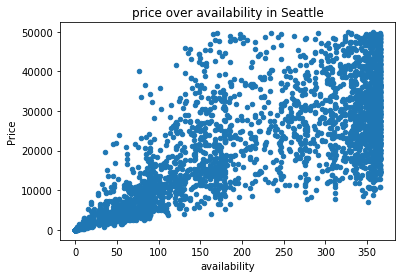

In [39]:
fig=plt.figure()
calendar_ls_n.plot('available','price',kind='scatter')
plt.xlabel('availability')
plt.ylabel('Price')
plt.title('price over availability in Seattle')
plt.show()

Then creating a scatter plot, I found there seems a positive relationship between price and availablity.



3. What factors will affect the price?


In [40]:
listing.corr()['price'].dropna().sort_values()[:-1]

reviews_per_month                -0.218588
number_of_reviews                -0.124695
longitude                        -0.102420
availability_90                  -0.058810
calculated_host_listings_count   -0.054092
host_id                          -0.051332
availability_60                  -0.049336
id                               -0.046289
review_scores_value              -0.041776
availability_30                  -0.037653
availability_365                 -0.015550
latitude                         -0.008904
maximum_nights                   -0.003336
review_scores_checkin             0.007877
review_scores_communication       0.012990
minimum_nights                    0.017297
review_scores_accuracy            0.019026
review_scores_cleanliness         0.054357
review_scores_rating              0.055551
review_scores_location            0.075069
Internet                          0.076280
host_listings_count               0.093962
host_total_listings_count         0.093962
Kitchen    

We can see that accommodates, bedrooms, beds, cleaning_fee have high positive correlation with price. and Reviews number has high negative correlation.
